In [120]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from nltk.tokenize.toktok import ToktokTokenizer
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize

ImportError: cannot import name 'Adam' from 'keras.layers' (C:\Users\90538\anaconda3\lib\site-packages\keras\layers\__init__.py)

In [76]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.1 in c:\users\90538\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.8.1)



In [44]:
df = pd.read_csv('IMDB Dataset.csv')

In [45]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [46]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [47]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [48]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['reviews']=df['review'].apply(denoise_text)

In [49]:
df['reviews']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: reviews, Length: 50000, dtype: object

In [50]:
df['reviews'] = df['reviews'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
df['reviews'] = df['reviews'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

df['reviews'] = df['reviews'].apply(lambda x: x.lower())

df['reviews'] = df['reviews'].apply(lambda x: x.strip())


In [51]:
df['sentiment'] = [ 1 if each == "positive" else 0 for each in df['sentiment']]

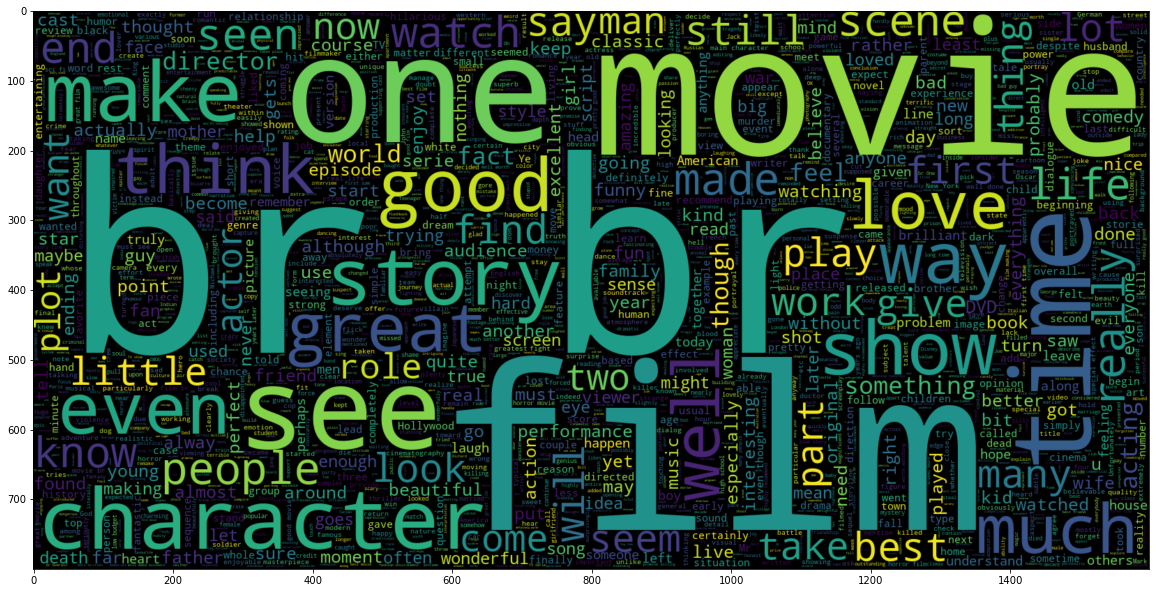

In [78]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

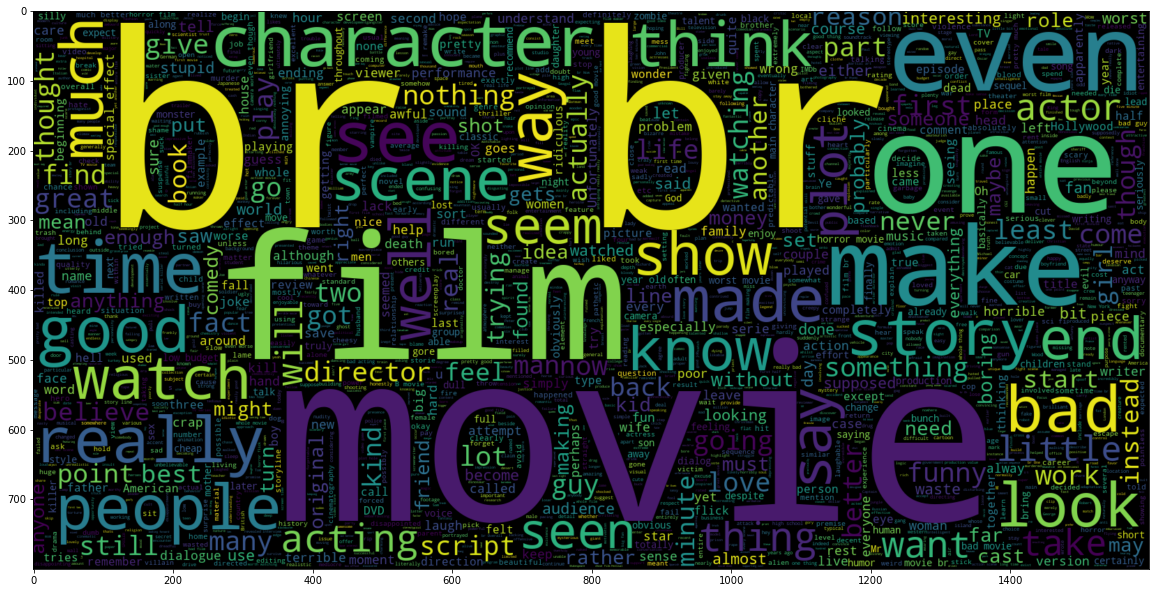

In [79]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

In [27]:
df['reviews']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: reviews, Length: 50000, dtype: object

In [52]:
df.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                             reviews  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful way to spend ti...  
3  basically there s a family where a little boy ...  
4  petter mattei s love in the time of money is a...

In [32]:
df['reviews'].head()

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
3    basic there s a famili where a littl boy jake ...
4    petter mattei s love in the time of money is a...
Name: reviews, dtype: object

In [53]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['reviews']=df['reviews'].apply(remove_stopwords)

{'do', 'her', 'only', 'so', "mightn't", 'i', 'were', 'or', 'who', 'weren', 'between', "needn't", 'he', 'above', 'haven', 'a', 'does', 'll', 'all', 'until', 'she', 'hasn', "you'd", 'why', 'such', 'did', 'theirs', 'm', 'having', 'isn', 'with', 'then', 'shouldn', "hasn't", 'its', 'their', 'against', "couldn't", "weren't", 'didn', 'out', 'hadn', 'just', 'but', 'through', "mustn't", 'to', "won't", 'more', 't', "shouldn't", 'about', 'during', 'other', 'here', 'has', 'no', 'before', "hadn't", 'mightn', 'where', 'own', 'how', "didn't", 're', 'nor', 'doing', "shan't", 'same', 'those', 'an', "that'll", 'which', 'than', 'at', 'further', 'his', 'down', 'off', 'and', 'himself', 'aren', 'both', 'itself', 'under', 'most', 'don', 'ourselves', 'themselves', 'this', 'will', 'doesn', 'him', "isn't", "doesn't", 'was', 'hers', 'if', 'am', 'can', 'we', 'been', "don't", 'these', 'not', 'when', 'being', 'because', 'o', 'into', 'that', 'my', 'up', 'ours', 'once', 'what', 'is', 'had', "haven't", 'each', "wasn't

In [55]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['reviews']=df['reviews'].apply(simple_stemmer)

In [56]:
df['reviews'].head()

0    one review mention watch oz episod hook right ...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
Name: reviews, dtype: object

In [64]:
from nltk.stem import WordNetLemmatizer

In [65]:
def simple_lemmatizer(text):
    lem = WordNetLemmatizer()
    text= ' '.join([lem.lemmatize(word) for word in text.split()])
    return text
#Apply function on review column
df['reviews']=df['reviews'].apply(simple_lemmatizer)

In [66]:
df['reviews'].head()

0    one review mention watch oz episod hook right ...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
Name: reviews, dtype: object

In [67]:
X = df['reviews']
y = df['sentiment']

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [88]:
print (vectorizer.vocabulary_)

{'one': 88628, 'review': 103303, 'mention': 78558, 'watch': 135806, 'oz': 90968, 'episod': 39406, 'hook': 58475, 'right': 103829, 'exactli': 40760, 'happen': 54537, 'meth': 78981, 'first': 45304, 'thing': 124552, 'struck': 118895, 'brutal': 16535, 'unflinch': 131072, 'scene': 107539, 'violenc': 134334, 'set': 110257, 'word': 139273, 'go': 50995, 'trust': 129030, 'show': 111774, 'faint': 42276, 'heart': 55611, 'timid': 126333, 'pull': 98931, 'punch': 98979, 'regard': 101785, 'drug': 35535, 'sex': 110418, 'hardcor': 54777, 'classic': 22769, 'use': 132550, 'wordit': 139286, 'call': 17929, 'nicknam': 85561, 'given': 50709, 'oswald': 89832, 'maximum': 77152, 'secur': 109106, 'state': 117298, 'penitentari': 92906, 'focus': 46184, 'mainli': 75086, 'emerald': 37961, 'citi': 22544, 'experiment': 41426, 'section': 109089, 'prison': 97743, 'cell': 19909, 'glass': 50787, 'front': 47961, 'face': 41968, 'inward': 63213, 'privaci': 97779, 'high': 56973, 'agenda': 2425, 'em': 37872, 'home': 58208, 'ma

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(x_train, y_train)

predict = linear_svc.predict(x_test)

C:\Users\90538\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))
print("Accuracy: \n", accuracy_score(y_test, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      7411
    Positive       0.86      0.87      0.87      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix: 
 [[6350 1061]
 [ 993 6596]]
Accuracy: 
 0.8630666666666666


In [93]:
tokenizer = Tokenizer(num_words= 15000, split=' ')
tokenizer.fit_on_texts(df['reviews'].values)
X = tokenizer.texts_to_sequences(df['reviews'].values)
X = pad_sequences(X)

In [94]:
X

array([[   0,    0,    0, ...,  431, 3342,  359],
       [   0,    0,    0, ...,  278,   17,  142],
       [   0,    0,    0, ...,   25,    8,  122],
       ...,
       [   0,    0,    0, ..., 5820, 3264, 1030],
       [   0,    0,    0, ..., 1784, 1430,  321],
       [   0,    0,    0, ...,  908,  613,    1]])

In [102]:
X = df['reviews']
y = df['sentiment']

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(X)

In [111]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [112]:
import numpy as np
#Then we take the word count of each of our sentences in our data and create a list.
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

281

In [113]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [114]:
x_train[1]

'wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sen particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [115]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [116]:
x_train_pad[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [122]:
from tensorflow import keras
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=15000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer'))

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 281, 50)           750000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 281, 16)           4288      
_________________________________________________________________
dropout_6 (Dropout)          (None, 281, 16)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 281, 8)            800       
_________________________________________________________________
dropout_7 (Dropout)          (None, 281, 8)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_8 (Dropout)          (None, 4)                

In [124]:
history = model.fit(x_train_pad, y_train, validation_split=0.2, epochs=7, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/7
32/32 [==============================] - 59s 2s/step - loss: 0.6890 - accuracy: 0.5988 - val_loss: 0.6255 - val_accuracy: 0.7692
Epoch 2/7
32/32 [==============================] - 53s 2s/step - loss: 0.5454 - accuracy: 0.8096 - val_loss: 0.4342 - val_accuracy: 0.8320
Epoch 3/7
32/32 [==============================] - 55s 2s/step - loss: 0.3773 - accuracy: 0.8780 - val_loss: 0.3753 - val_accuracy: 0.8627
Epoch 4/7
32/32 [==============================] - 47s 1s/step - loss: 0.3035 - accuracy: 0.9143 - val_loss: 0.3732 - val_accuracy: 0.8568
Epoch 5/7
32/32 [==============================] - 61s 2s/step - loss: 0.2597 - accuracy: 0.9316 - val_loss: 0.3555 - val_accuracy: 0.8645
Epoch 6/7
32/32 [==============================] - 54s 2s/step - loss: 0.2265 - accuracy: 0.9440 - val_loss: 0.3575 - val_accuracy: 0.8644
Epoch 7/7
32/32 [==============================] - 54s 2s/step - loss: 0.1997 - accuracy: 0.9541 - val_loss: 0.3672 - val_accuracy: 0.8618


In [125]:
result = model.evaluate(x_test_pad, y_test)

313/313 [==============================] - 16s 43ms/step - loss: 0.3561 - accuracy: 0.8698


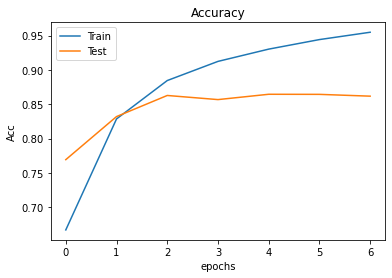

In [126]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

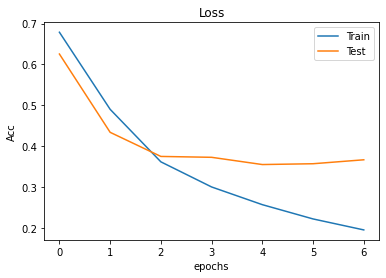

In [127]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()